In [1]:
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(16,9)})

import sqlite3
from tqdm import tqdm

In [4]:
foldername = "Jan_2010_Oct_2021"
regions_full = ["avon-and-somerset", "bedfordshire", "btp", "cambridgeshire", "cheshire", "city-of-london", "cleveland", "cumbria", "derbyshire", "devon-and-cornwall", "dorset", "durham", "dyfed-powys", "essex", "gloucestershire", "gwent", "hampshire", "hertfordshire", "humberside", "kent", "lancashire", "leicestershire", "lincolnshire", "merseyside", "metropolitan", "norfolk", "northamptonshire", "northern-ireland", "northumbria", "north-wales", "north-yorkshire", "nottinghamshire", "south-wales", "south-yorkshire", "staffordshire", "suffolk", "surrey", "sussex", "thames-valley", "warwickshire", "west-mercia", "west-midlands", "west-yorkshire", "wiltshire"]
print(len(regions_full))
# ends are inclusive
def load_dataset(filename, regions, start_year=2010, start_month=12, end_year=2021, end_month=10):
    global foldername
    dfs = []
    for year in range(start_year, end_year+1):
        for month in range(1 if year != start_year else start_month, 13 if year != end_year else end_month+1):
             for region in regions:
                try:
                    month_str = f"0{month}" if month < 10 else f"{month}"
                    path = f"{foldername}/{year}-{month_str}/{year}-{month_str}-{region}-{filename}.csv"
                    df = pd.read_csv(path)
                    dfs.append(df)
                except FileNotFoundError:
                    print(f"{path} not found")
    return pd.concat(dfs)

44


In [5]:
def create_sqlite_file(filename, regions):
    con = sqlite3.connect(filename)
    for region in tqdm(regions):
        df = load_dataset("street", [region])
        df.columns = df.columns.str.replace(' ','_')
        df.to_sql("street", con, if_exists="append")
    con.close()


In [7]:
# create_sqlite_file("data/data.sqlite", regions_full)

In [6]:
df = load_dataset("street", [regions_full[3]], 2010, 12, 2021,11)

NameError: name 'load_dataset' is not defined

In [7]:
df.info(verbose=True, show_counts=True)

NameError: name 'df' is not defined

Based on 2010-2012:

The columns Month, Reported By, Falls Within, Crime type, Location seem complete.

There are a handful Longitude/Latitudes/LSOA's missing

Many Crime ID's, Context, Last outcome category are missing


In [16]:
df.describe(include="all")

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
count,555868,854299,854299,854299,844202.000000,844202.000000,854299,844183,844183,854299,542723,0.0
unique,555863,130,1,1,NaN,NaN,8673,1299,1299,16,27,NaN
top,440242962546fbc7b8a08508df063a66881cbe1630484b...,2017-06,Cambridgeshire Constabulary,Cambridgeshire Constabulary,NaN,NaN,On or near Parking Area,E01032797,Cambridge 007G,Anti-social behaviour,Investigation complete; no suspect identified,NaN
freq,2,8098,854299,854299,NaN,NaN,26640,36209,36209,250013,277610,NaN
mean,NaN,NaN,NaN,NaN,-0.053731,52.411577,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.204183,0.181649,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-5.480675,50.212325,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,-0.245401,52.219943,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,-0.080129,52.432664,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,0.133032,52.577949,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2010-12,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.133546,52.226678,On or near Haviland Way,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN
1,NaN,2010-12,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.131529,52.230105,On or near Cadwin Field,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN
2,NaN,2010-12,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.132362,52.230683,On or near Nuns Way,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN
3,NaN,2010-12,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.135216,52.228518,On or near Kent Way,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN
4,NaN,2010-12,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.133320,52.228984,On or near Campkin Road,E01017975,Cambridge 001A,Anti-social behaviour,NaN,NaN


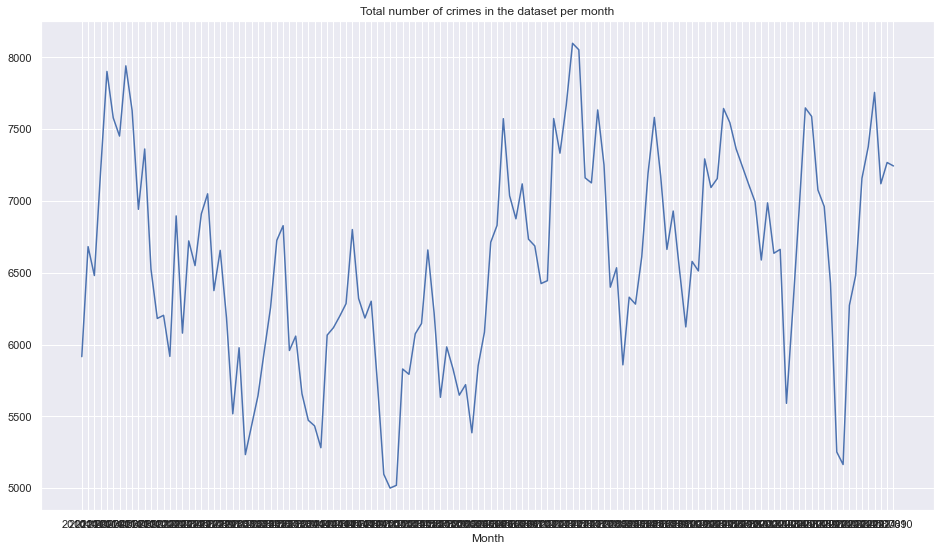

In [18]:
df_tot = df.groupby(["Month"]).size()
ax = sns.lineplot(data=df_tot);
ax.set_title("Total number of crimes in the dataset per month");

'2013-05'

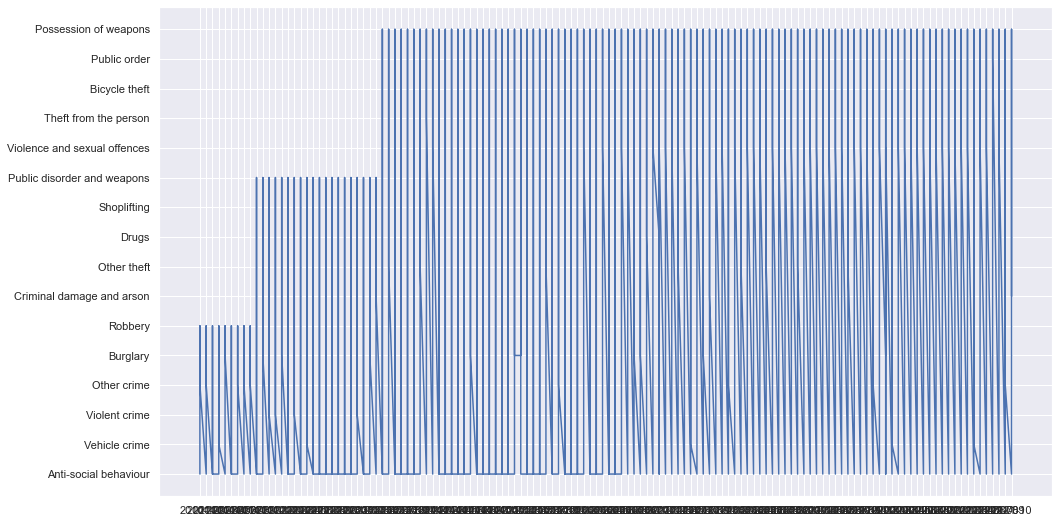

In [10]:
# What does this do haha
plt.plot(df["Month"], df["Crime type"]);
df[df["Crime type"] == "Bicycle theft"]["Month"].min()

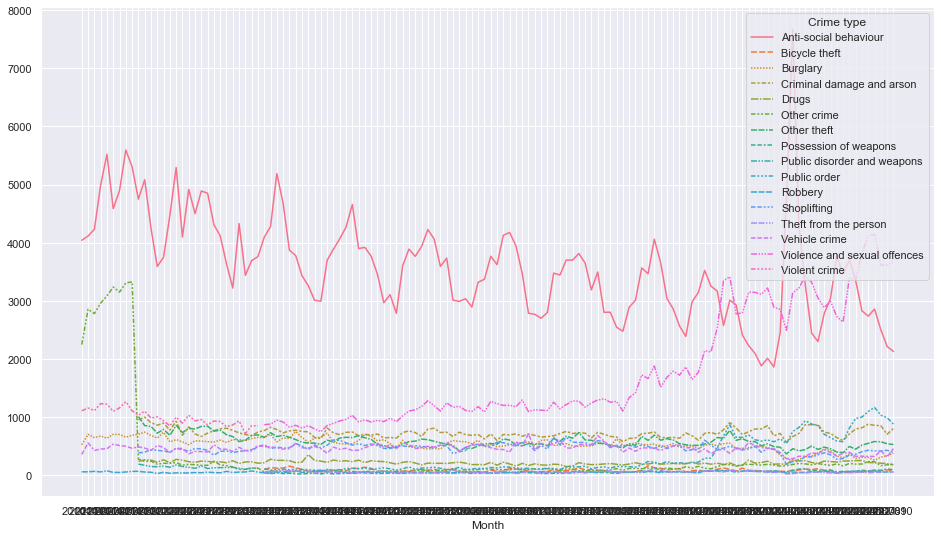

In [45]:
df_ct = df.groupby(["Month", "Crime type"]).size().unstack()
sns.lineplot(data=df_ct);

In [47]:
#But then this doesn't work?
# plt.plot(df["Month"], df["Last outcome category"]);

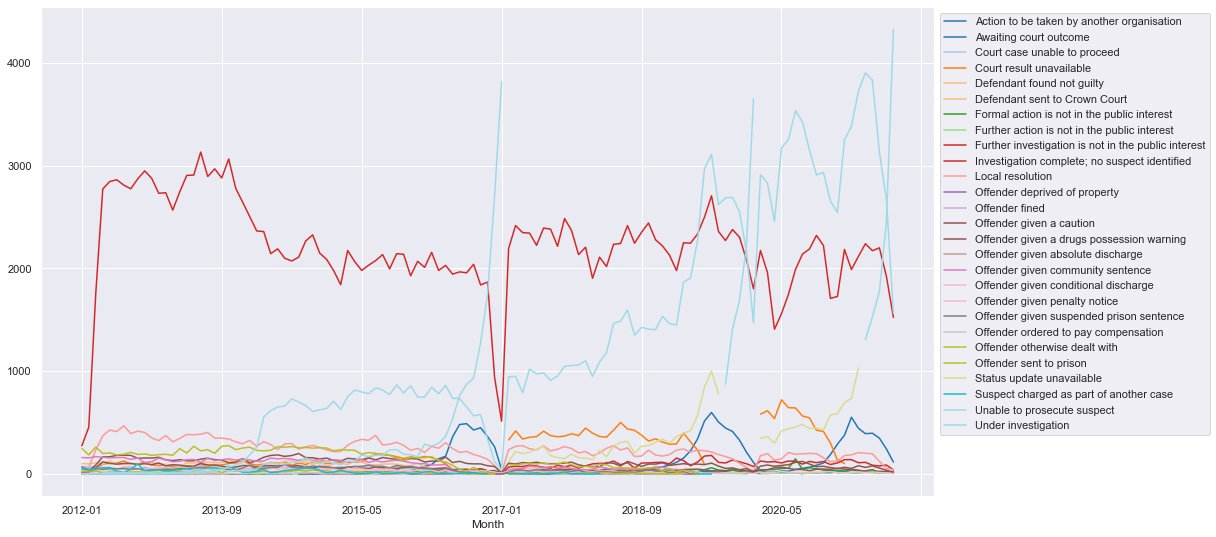

In [48]:
df_lastout = df.groupby(['Month', 'Last outcome category']).size() 
ax = df_lastout.unstack().plot(cmap='tab20')
ax.legend(bbox_to_anchor=(1,1), loc="upper left");

In [49]:
loc_counts = df["Location"].value_counts()
n = 20
toplocarray = loc_counts.head(20).index.array
toplocarray

<PandasArray>
[                        'On or near Supermarket',
                        'On or near Parking Area',
                       'On or near Shopping Area',
                      'On or near Petrol Station',
              'On or near Sports/Recreation Area',
                           'On or near Nightclub',
                         'On or near High Street',
                     'On or near Park/Open Space',
 'On or near Further/Higher Educational Building',
                     'On or near Victoria Street',
                   'On or near Pedestrian Subway',
                       'On or near Church Street',
                        'On or near Station Road',
                        'On or near Market Place',
                          'On or near Derby Road',
                       'On or near Bridge Street',
                'On or near Theatre/Concert Hall',
                         'On or near London Road',
                        'On or near South Street',
                 

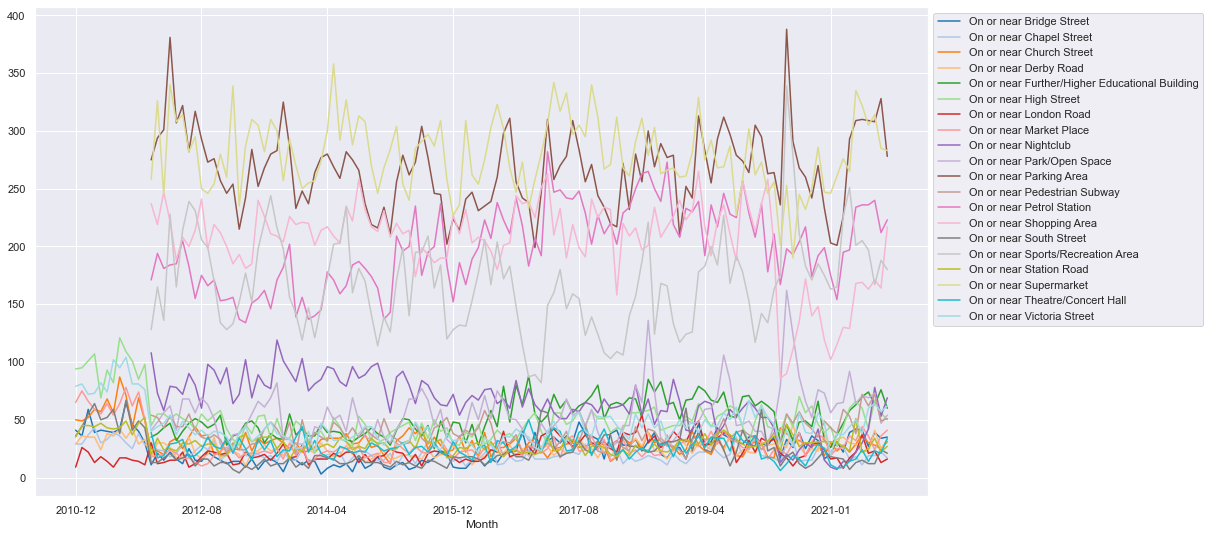

In [50]:
df_loc = df[df["Location"].isin(toplocarray)].groupby(['Month', 'Location']).size() 
ax = df_loc.unstack().plot(cmap='tab20')
ax.legend(bbox_to_anchor=(1,1), loc="upper left");

In [51]:
dfn = df.dropna(axis=0, subset=["Month", "Crime type", "Falls within", "Reported by", "Longitude", "Latitude", "LSOA name", "LSOA code"], how="any")
dfn.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141995 entries, 0 to 9819
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Crime ID               613712 non-null   object 
 1   Month                  1141995 non-null  object 
 2   Reported by            1141995 non-null  object 
 3   Falls within           1141995 non-null  object 
 4   Longitude              1141995 non-null  float64
 5   Latitude               1141995 non-null  float64
 6   Location               1141995 non-null  object 
 7   LSOA code              1141995 non-null  object 
 8   LSOA name              1141995 non-null  object 
 9   Crime type             1141995 non-null  object 
 10  Last outcome category  600520 non-null   object 
 11  Context                0 non-null        float64
dtypes: float64(3), object(9)
memory usage: 113.3+ MB


In [52]:
#Normalize monthly crime type by the total crime that month
dfn_ct = dfn.groupby(["Month", "Crime type"]).size()
dfn_tot = dfn.groupby(["Month"]).size()
dfn_ct_norm = dfn_ct/dfn_tot
dfn_ct_norm

Month    Crime type                  
2010-12  Anti-social behaviour           0.485931
         Burglary                        0.062530
         Other crime                     0.269841
         Robbery                         0.006373
         Vehicle crime                   0.042448
                                           ...   
2021-10  Robbery                         0.004990
         Shoplifting                     0.039409
         Theft from the person           0.004888
         Vehicle crime                   0.046232
         Violence and sexual offences    0.372912
Length: 1688, dtype: float64

In [53]:
#Sanity check, should be all ones
dfn_ct_norm.groupby("Month").sum()

Month
2010-12    1.0
2011-01    1.0
2011-02    1.0
2011-03    1.0
2011-04    1.0
          ... 
2021-06    1.0
2021-07    1.0
2021-08    1.0
2021-09    1.0
2021-10    1.0
Length: 130, dtype: float64

<AxesSubplot:xlabel='Month'>

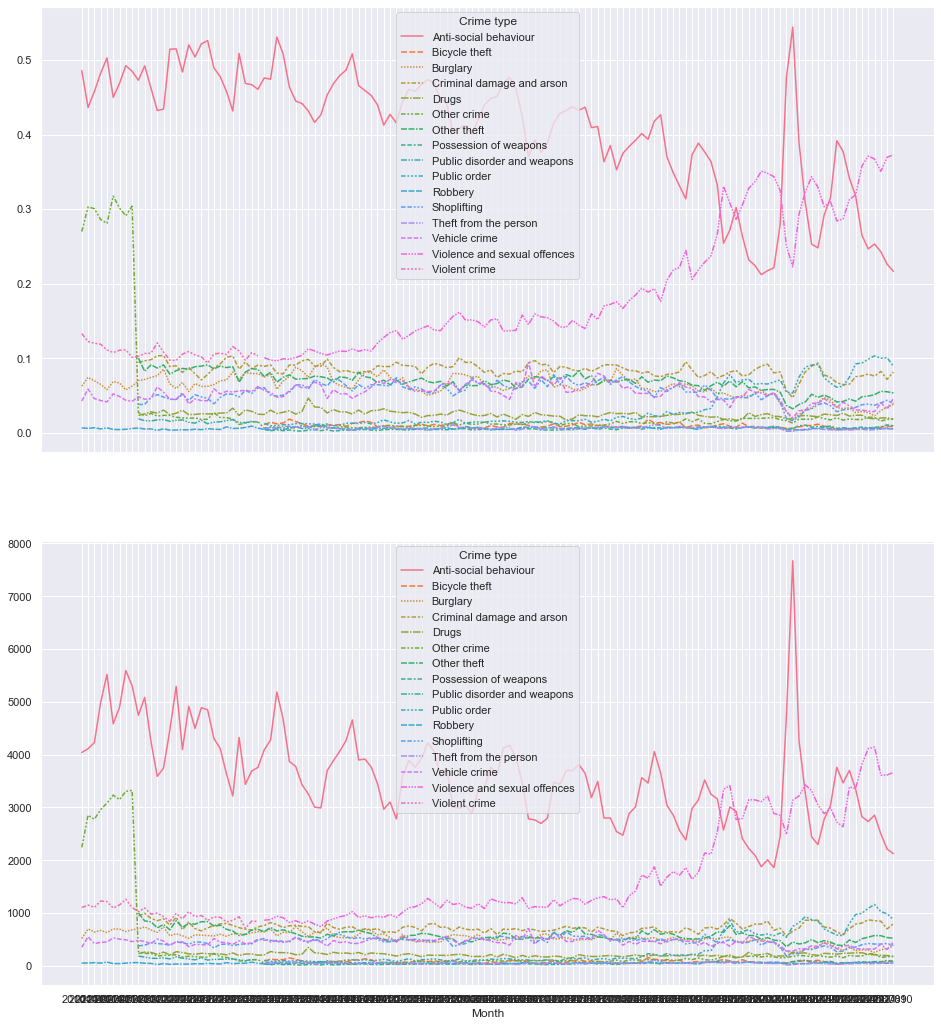

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16,18))
sns.lineplot(data=dfn_ct_norm.unstack(), ax=ax[0]);
sns.lineplot(data=df_ct, ax=ax[1])

In [55]:
# for i in range(2,3):
#     fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=True)
#     columns = df.columns
    
#     df_pm = dfn.groupby(["Reported by", "Location", "Month"]).size().to_frame().reset_index()
    
#     sns.boxplot(data=df_pm, x="Reported by", y="Location", ax=axes[0])
# #     df.boxplot(column='Reported by', by= columns[i], figsize= (8,8), ax=axes[0])
# #     axes[0].title(f'Reported by vs. {columns[i]}')
# #     df.boxplot(column='Crime type', by= columns[i], figsize= (8,8), ax=axes[1])
# #     plt.show()
# df_pm.head()

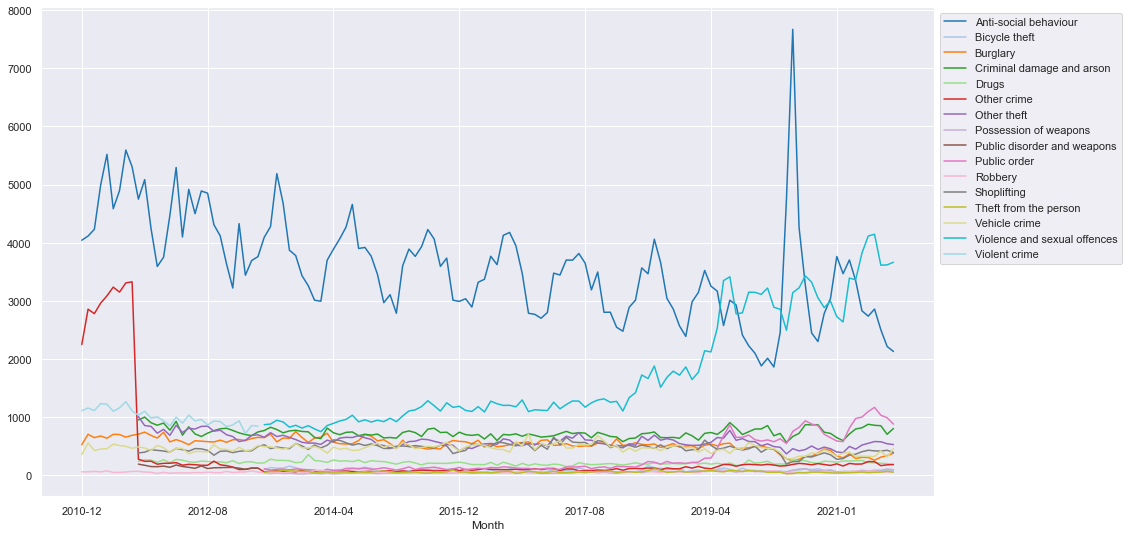

In [57]:
df_noloc = df[df["Location"] != "No Location"].groupby(['Month', 'Crime type']).size() 
ax = df_noloc.unstack().plot(cmap='tab20')
ax.legend(bbox_to_anchor=(1,1), loc="upper left");

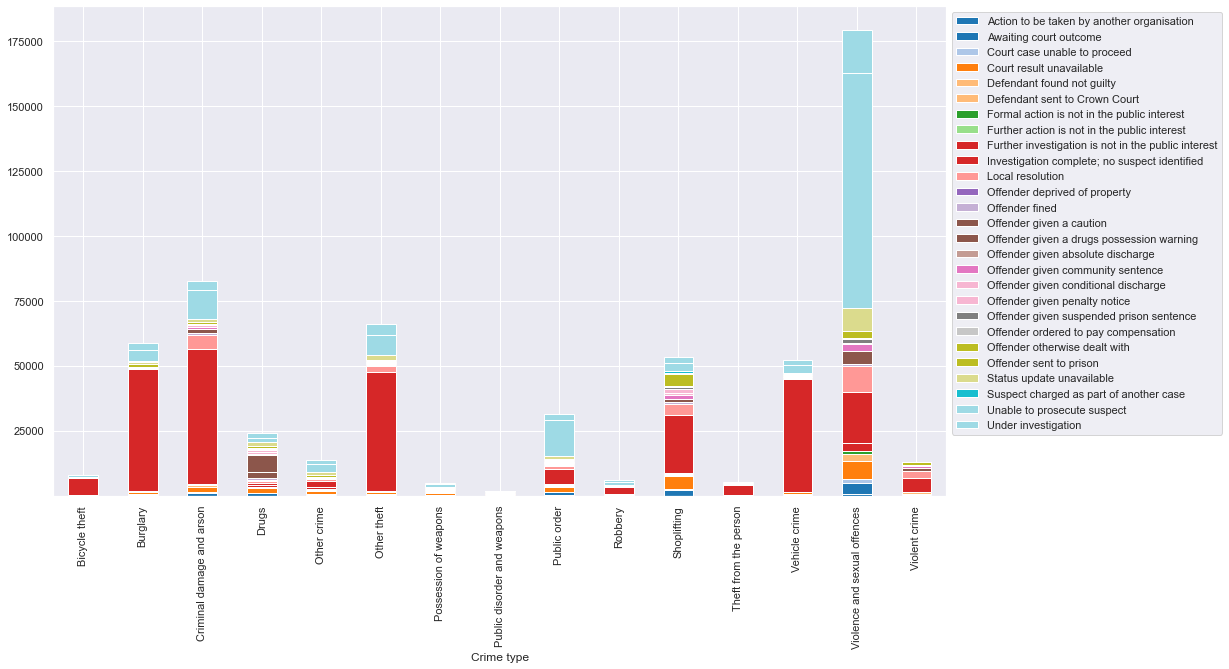

In [38]:
df_outcomepertype = dfn.groupby(["Crime type", "Last outcome category"]).size().unstack()
df_outcomepertype.head()
ax = df_outcomepertype.plot(kind="bar", stacked=True, cmap="tab20");

ax.legend(bbox_to_anchor=(1,1), loc="upper left");

